In [ ]:
!pip install tinymlgen

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tinymlgen import port
print(tf.__version__)

2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_train = pd.read_csv("/content/gdrive/My Drive/tinyML/mitbih_train.csv", header=None)
df_test = pd.read_csv("/content/gdrive/My Drive/tinyML/mitbih_test.csv", header=None)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


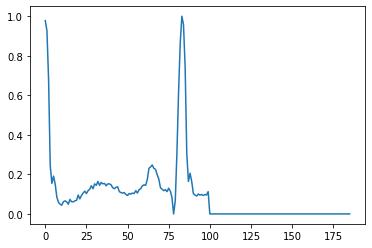

In [ ]:
plt.plot(df_train.iloc[0,:186])

In [ ]:
print(df_train[187].value_counts())
print(df_test[187].value_counts())

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [ ]:
X_train = df_train.values[:, :-1]
y_train = df_train.values[:, -1].astype(int)

X_test  = df_test.values[:, :-1]
y_test  = df_test.values[:, -1].astype(int)

print(X_train.shape)
print(X_test.shape)

(87554, 187)
(21892, 187)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1],1)

print(X_train.shape)
print(X_test.shape)

(87554, 1, 187, 1)
(21892, 1, 187, 1)


In [ ]:
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(87554, 5)
(21892, 5)


In [ ]:
input_shape = X_train.shape[1:]
num_classes= 5

In [ ]:
# Build Model 
from tensorflow.keras import models, layers

inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(inputs)
x = layers.Flatten()(x)
x = layers.Dense(16)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1, 187, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 187, 16)        416       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2992)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                47888     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 85        
Total params: 48,389
Trainable params: 48,389
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 100
num_epochs = 10 

In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
876/876 [==============================] - 3s 3ms/step - loss: 0.4833 - accuracy: 0.8686 - val_loss: 0.2307 - val_accuracy: 0.9389
Epoch 2/10
876/876 [==============================] - 3s 3ms/step - loss: 0.2059 - accuracy: 0.9445 - val_loss: 0.1807 - val_accuracy: 0.9530
Epoch 3/10
876/876 [==============================] - 3s 3ms/step - loss: 0.1680 - accuracy: 0.9555 - val_loss: 0.1619 - val_accuracy: 0.9567
Epoch 4/10
876/876 [==============================] - 3s 3ms/step - loss: 0.1587 - accuracy: 0.9575 - val_loss: 0.1554 - val_accuracy: 0.9585
Epoch 5/10
876/876 [==============================] - 2s 3ms/step - loss: 0.1441 - accuracy: 0.9606 - val_loss: 0.1474 - val_accuracy: 0.9608
Epoch 6/10
876/876 [==============================] - 2s 3ms/step - loss: 0.1363 - accuracy: 0.9632 - val_loss: 0.1465 - val_accuracy: 0.9605
Epoch 7/10
876/876 [==============================] - 3s 3ms/step - loss: 0.1343 - accuracy: 0.9637 - val_loss: 0.1380 - val_accuracy: 0.9632
Epoch 

In [ ]:
# Save Model
models.save_model(model, 'ecg_arrhythmia.h5')

In [ ]:
# Test Model
y_pred = model.predict(X_test, batch_size=1000)

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18118
           1       0.87      0.56      0.68       556
           2       0.89      0.89      0.89      1448
           3       0.75      0.50      0.60       162
           4       0.97      0.94      0.96      1608

    accuracy                           0.96     21892
   macro avg       0.89      0.78      0.82     21892
weighted avg       0.96      0.96      0.96     21892



In [ ]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(y_test, y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(y_test, y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(y_test, y_pred)))

ranking-based average precision : 0.981
Ranking loss : 0.012
Coverage_error : 1.047


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("ecg_arrhythmia.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgo0c3u8z/assets


INFO:tensorflow:Assets written to: /tmp/tmpgo0c3u8z/assets


195656

In [ ]:
from tinymlgen import port
c_code = port(model, variable_name='ecg_arrhythmia', pretty_print=True, optimize=False) 

with open('ecg_arrhythmia.h', 'w') as f:
    print(c_code, file=f)

INFO:tensorflow:Assets written to: /tmp/tmpwzwa9gwh/assets


INFO:tensorflow:Assets written to: /tmp/tmpwzwa9gwh/assets


For ESP32 input data

---



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model,load_model

In [ ]:
df3 = pd.read_csv("/content/gdrive/My Drive/tinyML/mitbih_test.csv", header=None)
model=load_model("/content/gdrive/My Drive/tinyML/ecg_arrhythmia.h5")

In [ ]:
for s_n in range (0,21889):
  if df3.values[s_n:s_n+1, 187:] == 3:
    print(s_n)

[[2.8327852e-02 3.0096110e-06 1.6800100e-02 9.5485985e-01 9.2395740e-06]]
3
Fusion of ventricular and normal


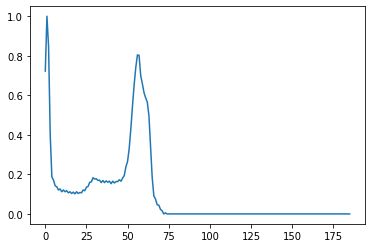

In [ ]:
s_n = 20167
plt.plot(df3.iloc[s_n,:186]) 
X_test = df3.values[s_n:s_n+1, :-1] 
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1],1)
ypred = model.predict(X_test)
print(ypred)
with open('x_test.h', 'w') as f:
    print("float x_test_dat[187] = {", file=f)    
    s="    "
    for i in range(187):
        s+=str(X_test[0][0][i][0])+', '
        if i==186:
            print(s, file=f) 
        elif (i+1)%8==0:
            print(s, file=f)
            s="    "
    print("};", file=f)
f.close()
y_p_r=np.around(ypred).astype(int)
y=0
for n in range(0,4):
  if y_p_r[:,n:n+1]==1:
    break
  y=y+1
print(y)
if y==0:
  print("Normal")
elif y==1:
  print("Artial Premature")
elif y==2:
  print("Premature ventricular conraction")
elif y==3:
  print("Fusion of ventricular and normal")
else:
  print("Fusion of paced and normal")